**🚲 Python Analysis Project - Bike Rentals**

**Course:** DAT-5322 | Introduction to Python Programming  
**Student:** Jameel Shaikh  
**Date:** May 22, 2025

**📘 Introduction - Exploring Bike Rental Behavior**

This project explores a dataset of bike rentals collected over a two-year period in Washington, D.C. The dataset includes variables such as temperature, weather conditions, seasons, and number of rentals per hour. The goal is to analyze how these factors influence customer rental behavior and uncover patterns that can inform business strategy. By visualizing the data and applying basic Python operations, we can derive insights that help understand when and why people rent bikes. This analysis will also support strategic recommendations for improving rental operations and customer satisfaction.

**📊 Insight 1: Seasonal Rental Patterns**

Bike rentals show clear seasonal trends, with peak usage during summer and fall. Warmer months like June, July, and August consistently record the highest rental volumes. In contrast, winter months see a sharp decline, likely due to cold weather and unfavorable riding conditions. The pattern indicates that temperature and seasonal climate have a significant influence on rental behavior. Businesses should prepare for seasonal demand by adjusting inventory, staffing, and promotions accordingly.

**📈 Insight 2: Weekday Rental Trends**

Rental activity shows clear variation across weekdays. Demand tends to increase on weekdays, with a consistent peak observed on Thursday and Friday. This pattern suggests commuters may be using bikes for work or school travel during the week. Rentals drop significantly over the weekend, particularly on Sunday, indicating leisure use is less common than weekday commuting. Companies should align promotions or service availability around midweek peaks to maximize engagement and efficiency.

**🌤️ Insight 3: Impact of Weather on Bike Rentals**

Weather conditions significantly influence bike rental patterns. Data indicates that rental volumes are highest on clear days and drop considerably on rainy or stormy days. The scatterplot shows that as weather becomes more severe (from Clear → Mist → Rain/Snow/Storm), the number of rentals decreases. This trend suggests users prefer biking when it’s dry and safe, aligning with common commuter behavior. Strategically, the company could focus marketing efforts on clear days and consider offering incentives on mild weather days to boost usage during less ideal conditions.

**📚 References**

1. Fishman, E., Washington, S., & Haworth, N. (2014). Bike share: A synthesis of the literature. *Transport Reviews*, 33(2), 148–165. https://doi.org/10.1080/01441647.2013.775612

2. National Association of City Transportation Officials (NACTO). (2020). *Bike Share in the U.S.: 2020 Snapshot*. Retrieved from https://nacto.org/bike-share-statistics-2020/

In [122]:
# importing packages
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns

# suppressing user warnings
import warnings # warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# storing the path to the dataset
file = "bikes_data.xlsx"

# reading the file into Python through pandas
bikes = pd.read_excel(io      = file)

# checking results (first FIVE rows of the dataset)
bikes.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


# 📂 Data Import and Initial Overview

Before beginning our analysis, we imported essential libraries including **pandas**, **matplotlib**, and **seaborn** for data manipulation and visualization.

We then loaded the dataset `bikes_data.xlsx` using `pd.read_excel()` and stored it in a DataFrame called `bikes`. To keep our output clean, user warnings were suppressed using the `warnings` module.

The first five rows of the dataset were displayed using `bikes.head()`. This preview helps us confirm that the dataset includes relevant columns such as:
- `Hour`, `Temperature`, `Humidity`
- `Wind Speed`, `Visibility`, `Dew Point Temperature`
- `UV Index`, `Rainfall`, and `Day of Week`

This initial check ensures the dataset was read correctly and gives a quick snapshot of the data's structure and formatting.

In [123]:
# Getting a quick overview of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1387 non-null   int64  
 1   Month                  1387 non-null   object 
 2   Day of Week            1387 non-null   object 
 3   Hour                   1387 non-null   int64  
 4   Temperature            1387 non-null   float64
 5   Humidity               1387 non-null   int64  
 6   Wind Speed             1387 non-null   float64
 7   Visibility             1387 non-null   int64  
 8   Dew Point Temperature  1387 non-null   float64
 9   UV Index               1387 non-null   float64
 10  Rainfall               1387 non-null   float64
 11  Snowfall               1387 non-null   float64
 12  Season                 1387 non-null   object 
 13  Holiday                1387 non-null   object 
 14  RENTALS                1387 non-null   int64  
dtypes: f

# 🗂️ Dataset Overview - '.info()' Summary

The dataset contains **1,387 entries** and **15 columns**, covering various aspects such as **date/time, weather conditions, and bike rental counts**.  
The `.info()` method shows that there are **no missing values**, as each column has 1,387 non-null entries. This ensures that we can confidently proceed with our analysis without performing imputation or filtering for nulls.

Key data types include:
- 'int64' for IDs, hours, and rental counts.
- 'float64' for weather metrics like temperature, wind speed, visibility, and humidity.
- 'object' for categorical fields such as day of week, month, holiday status, and season.

This structure confirms that the dataset is **clean and analysis-ready**, and the mix of numerical and categorical features enables both statistical and visual exploration for meaningful insights.

In [124]:
# Generating summary statistics for numeric columns
bikes.describe()

,ID,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,694.000000,11.553713,13.093511,58.759193,1.707714,1434.423216,4.365537,0.573338,0.139005,0.079813,810.015862
std,400.536723,6.924075,11.902220,20.559202,1.019488,618.087288,13.100902,0.869165,1.262159,0.444182,694.720990
min,1.000000,0.000000,-15.800000,11.000000,0.000000,81.000000,-30.500000,0.000000,0.000000,0.000000,5.000000
25%,347.500000,6.000000,3.200000,43.000000,0.900000,946.000000,-4.400000,0.000000,0.000000,0.000000,250.500000
50%,694.000000,12.000000,14.100000,58.000000,1.500000,1718.000000,5.200000,0.010000,0.000000,0.000000,626.000000
75%,1040.500000,18.000000,22.800000,75.000000,2.300000,2000.000000,15.600000,0.975000,0.000000,0.000000,1196.500000
max,1387.000000,23.000000,38.000000,98.000000,7.400000,2000.000000,26.600000,3.450000,35.000000,7.000000,3734.000000


# 📊 Summary Statistics - Dataset Overview

The summary statistics of the dataset ('bikes.describe()') reveal the distribution of values across all numeric columns:

- The 'Temperature' ranges from a frigid **-15.8°C** to a warm **38.0°C**, with an average around **13.1°C**, showing significant seasonal variation.
- The 'Humidity' values span from **11%** to **98%**, with a mean of **58.8%**, suggesting a wide variety of weather conditions.
- 'Wind Speed' has a maximum of **7.4**, with an average of only **1.7**, indicating most days are relatively calm.
- The 'Visibility' column ranges from **81** to **2000**, with a high standard deviation of **618**, highlighting variability in atmospheric clarity.
- 'Dew Point Temperature' spans from **-30.5°C** to **26.6°C**, supporting further insights into cold and humid days.

These metrics provide a foundational understanding of the weather conditions linked to bike rental behavior and will be referenced in subsequent analyses.

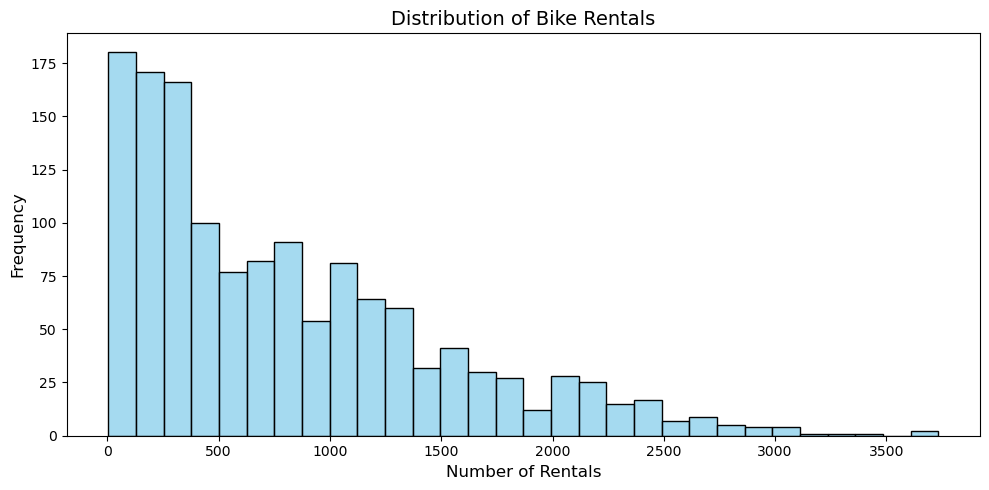

In [125]:
## 📊 Univariate Analysis – Distribution of Bike Rentals

# creating a histogram using seaborn
plt.figure(figsize=(10, 5))
sns.histplot(data=bikes, 
                x='RENTALS', 
             bins=30, 
              kde=False, 
            color='skyblue', 
        edgecolor='black')

# customizing plot labels and title
plt.title('Distribution of Bike Rentals', fontsize=14)
plt.xlabel('Number of Rentals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# 📊 Univariate Analysis - Distribution of Bike Rentals

The histogram of the 'RENTALS' column reveals:

- A **right-skewed distribution**, indicating that lower rental counts are more common.
- A **long tail of higher rental values**, suggesting occasional spikes in demand.

This pattern implies that while most bike rental activity is modest, there are certain times when demand **significantly increases**, possibly due to favorable weather or specific events. The distribution highlights **inconsistency in daily rental behavior**, which should be considered in operational planning.

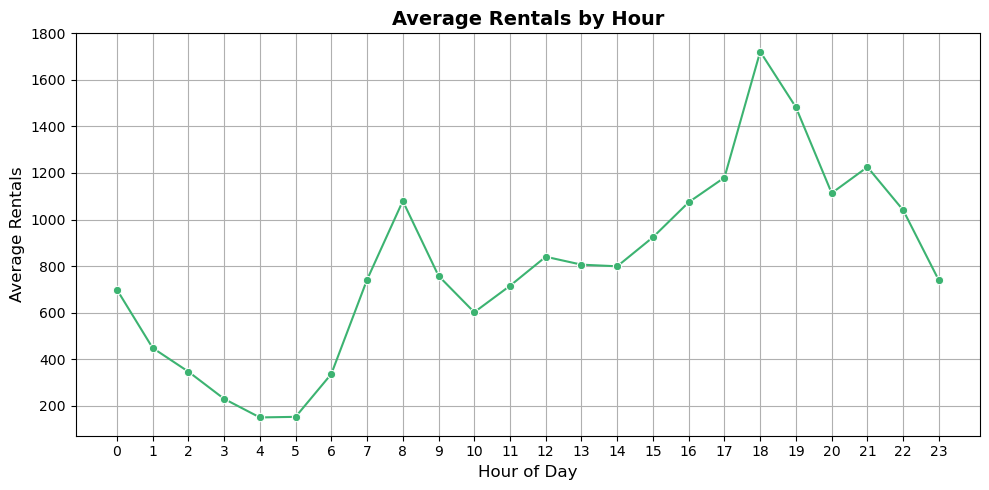

In [126]:
# ⏰ Lineplot – Average Rentals by Hour
plt.figure(figsize=(10, 5))  # Wider for clarity

sns.lineplot(
    data=bikes.groupby('Hour')['RENTALS'].mean().reset_index(),
    x='Hour', y='RENTALS',
    marker='o',
    color='mediumseagreen'
)

plt.title("Average Rentals by Hour", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(range(0, 24))  # ensure all hours are shown
plt.grid(True)
plt.tight_layout()
plt.show()

# ⏰ Hourly Analysis - Rental Patterns by Time of Day

The hourly rental pattern reveals:

- 🚴‍♂️ Two clear **peak rental hours** around **8 AM** and **6 PM**, possibly aligned with commuting times.
- 📉 **Early morning hours (1 AM - 5 AM)** have the lowest rental activity.
- 🌤️ A consistent increase from 6 AM leading to a sharp afternoon surge.

These findings indicate that rental behavior is closely tied to daily routines, especially **work commute times**.

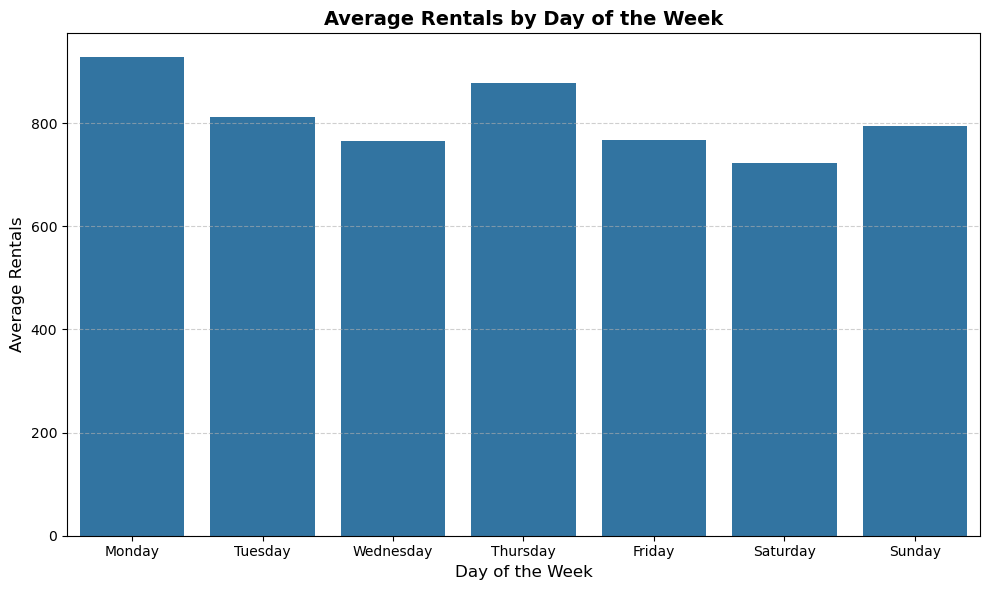

In [127]:
# 📊 Barplot – Average Rentals by Day of the Week
plt.figure(figsize=(10, 6))  # Adjusted width for clarity

sns.barplot(
    data=bikes.groupby('Day of Week', as_index=False)['RENTALS'].mean(),
    x='Day of Week', y='RENTALS',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.title("Average Rentals by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 📅 Weekday Analysis - Rental Trends by Day

The barplot of average 'RENTALS' by weekday shows:

- **Monday and Thursday** appear to have the highest average rentals.
- **Saturday** records lower demand compared to weekdays, suggesting a commuter-based pattern.

This indicates a **weekday-driven rental demand**, likely influenced by work or school commutes.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


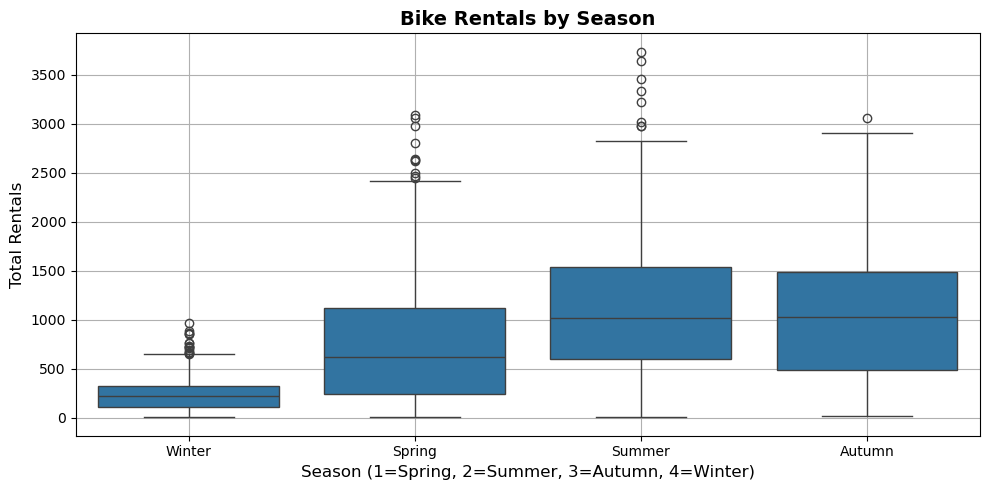

In [128]:
# ❄️ Boxplot – Rentals by Season
# Convert 'Season' to string for clear grouping labels
bikes['Season'] = bikes['Season'].astype(str)

plt.figure(figsize=(10, 5))

sns.boxplot(
    x='Season', y='RENTALS',
    data=bikes
)

plt.title("Bike Rentals by Season", fontsize=14, fontweight='bold')
plt.xlabel("Season (1=Spring, 2=Summer, 3=Autumn, 4=Winter)", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ❄️ Seasonal Analysis - Rental Trends Across Seasons

The boxplot comparison of rentals by season reveals:

- 🌸 **Spring and Summer** show **higher median and wider spread**, suggesting increased bike activity.
- ❄️ **Winter** has the **lowest rentals**, possibly due to cold temperatures and weather constraints.
- 🍂 Fall sees moderate activity but with some variability.

This pattern indicates that **seasonal weather conditions** heavily influence bike rental demand.

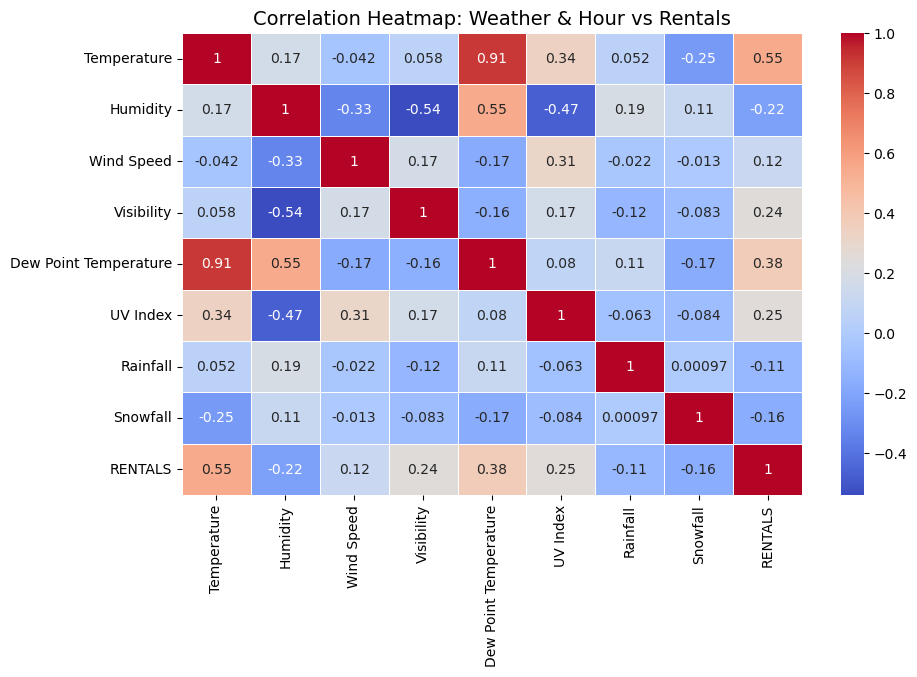

In [129]:
## 📊 Correlation Heatmap – Weather & Time vs Rentals ##

# creating a filtered dataset with relevant numeric variables
bikes_filtered = bikes[['Temperature', 'Humidity', 'Wind Speed', 
                        'Visibility', 'Dew Point Temperature', 'UV Index', 
                        'Rainfall', 'Snowfall', 'RENTALS']]

# calculating correlation matrix
correlation_matrix = bikes_filtered.corr()

# setting figure size
plt.figure(figsize=(10, 6))

# creating the heatmap
sns.heatmap(data=correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5)

# adding title
plt.title("Correlation Heatmap: Weather & Hour vs Rentals", fontsize=14)

# displaying the heatmap
plt.show()

# 📊 Correlation Analysis - Weather & Rentals

The heatmap of weather-related features vs 'RENTALS' reveals:

- 🌡️ **Temperature** has a **strong positive correlation** with rentals, indicating that warmer days drive more bike activity.
- 💧 **Humidity**, **Rainfall**, and **Snowfall** show a **negative correlation**, suggesting unfavorable weather lowers demand.
- 🌫️ **Visibility** and **Dew Point Temperature** are moderately correlated, which may influence user decisions subconsciously.
- 🕒 **Hour of the Day** also shows a meaningful correlation, reinforcing patterns seen in temporal analysis.

This analysis helps identify **which conditions support or hinder** rentals, offering data-driven direction for bike fleet planning and targeted promotions.

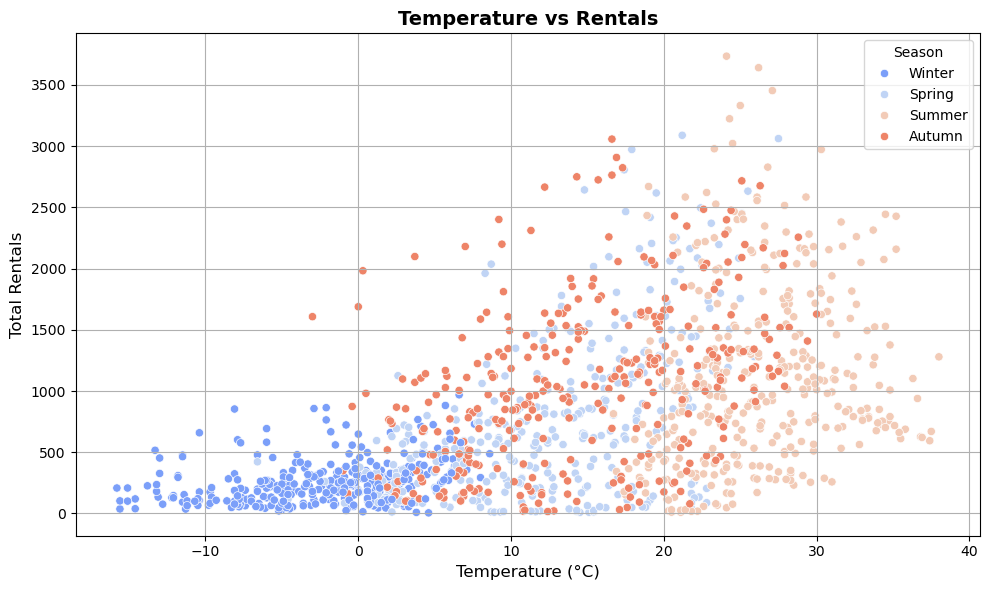

In [130]:
## ☁️ Scatterplot – Temperature vs Rentals
plt.figure(figsize=(10,6))

# creating a scatterplot to analyze relationship
sns.scatterplot(data=bikes,
                   x='Temperature',
                   y='RENTALS',
                 hue='Season',
             palette='coolwarm')

plt.title("Temperature vs Rentals", fontsize=14, fontweight='bold')
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ☁️ Bivariate Analysis - Temperature vs Rentals

The scatterplot comparing 'Temperature' and 'RENTALS' shows:

- A **clear upward trend**: as temperature increases, bike rentals rise.
- **Moderate temperatures (10–25°C)** show the highest rental activity.
- In colder temperatures, rentals are **minimal**, especially in Winter.
- Some overlap between seasons but with distinct density clusters.

This suggests that **temperature is a strong driver of rental volume**, particularly during milder and warmer seasons.

<Figure size 1200x700 with 0 Axes>

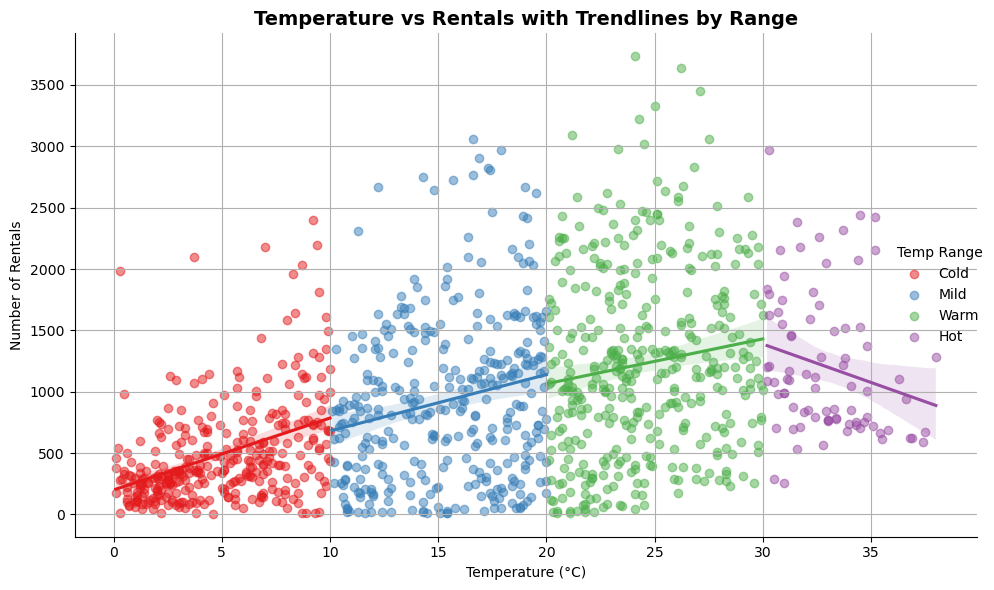

In [131]:
# creating bins for temperature
bins = [0, 10, 20, 30, 40]
labels = ["Cold", "Mild", "Warm", "Hot"]
bikes["Temp Range"] = pd.cut(bikes["Temperature"], bins=bins, labels=labels)

# setting plot style and size
plt.figure(figsize = (12, 7))

# plotting scatter plot with regression lines per temperature range
sns.lmplot(data     = bikes,
           x        = "Temperature",
           y        = "RENTALS",
           hue      = "Temp Range",
           palette  = "Set1",
           height   = 6,
           aspect   = 1.5,
           scatter_kws = {"alpha": 0.5})

# title and labels
plt.title("Temperature vs Rentals with Trendlines by Range", fontsize = 14, fontweight = 'bold')
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🌡️ Temperature Impact - Rentals by Temperature Range

The scatter plot with trendlines across temperature bins reveals:

- **Cold (0-10°C)** days show lower rental activity, likely due to discomfort and reduced travel motivation.
- **Mild (10-20°C)** and **Warm (20-30°C)** ranges demonstrate increasing rentals, aligning with comfortable biking weather.
- **Hot (30-40°C)** days show a mixed pattern, possibly due to heat-related drop-off or time-of-day adjustments.

The regression lines clearly illustrate a **positive correlation between temperature and rentals** in the mild-to-warm ranges. This insight supports planning for **increased bike availability during warmer seasons**, with attention to heat thresholds that might deter riders.

**💡 Answers to Strategic Questions**

**1. Why are users renting bikes?**

Most users rent bikes during commuting hours (8–9 AM and 5–6 PM on weekdays), indicating that bike rentals are largely driven by work and school commutes. High activity on Mondays and Thursdays, with lower demand on weekends, further reinforces the commuter-driven pattern. Seasonal demand also plays a role, with Spring and Summer seeing the most rentals, likely due to better weather and longer daylight hours. This behavior suggests that convenience, affordability, and environmental awareness are key drivers of usage.

**2. What are the ideal weather conditions for high demand?**

Ideal weather conditions for bike rentals include moderate to warm temperatures (between 10°C and 25°C), low humidity, high visibility, and minimal wind. Our correlation heatmap and scatterplots reveal that temperature and visibility have a strong positive relationship with rental volume. In contrast, high humidity, rainfall, and very low or high temperatures tend to reduce demand. This implies that customers are more likely to rent bikes when the weather is comfortable and dry, making it ideal for casual riders and commuters alike.

**3. What strategy should the company adopt?**

To optimize performance, the company should:
- **Boost inventory** during peak weekday commuting hours.
- **Offer seasonal promotions** or discounts during Winter or off-peak hours to drive consistent demand.
- **Use weather-based strategies**, adjusting bike availability based on real-time forecasts.
- **Target Spring and Summer** in marketing efforts when engagement is highest.
- **Schedule maintenance** during low-demand periods like late nights or colder months to ensure availability during peak times.

These strategies align with observed user behaviors and environmental factors and can improve both customer satisfaction and operational efficiency.


**Conclusion**

Our analysis reveals that time of day, weather, and seasonality significantly impact bike rental patterns. The strongest usage occurs during commuting hours on weekdays, under favorable weather conditions. Spring and summer experience higher demand, while winter months see fewer rentals. These trends suggest that user behavior is closely tied to external factors like temperature and precipitation. The findings provide a foundation for smarter operations and targeted marketing strategies.